In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
from pathlib import Path

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle: int | None = 1000
ensemble: int | None = 1000
sampling: int | None = 100
slope: float | None = None
Lambda: float | None = None
degree: int | None = 2
interval: int = 500
tau = 1.0
Da = 1.0
T = 0.001

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = T,
    tau = tau,
    Da = Da,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    interval = interval,
    degree = degree,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
# df[(df["slope"] >= 0.3)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,interval,degree,drag,std,time
825,c0822f,1000,1000,0.001,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,500,2,4.254,1.397626,6830.517809
734,5bfa43,1000,1000,0.003,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,500,2,0.139,1.381468,6752.050674
123,48435f,1000,1000,0.010,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,500,2,0.935,1.398365,6767.906329
755,0d9fe6,1000,1000,0.030,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,500,2,5.427,1.380004,6744.043646
1764,0ddb1b,1000,1000,0.100,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,500,2,17.829,1.394445,6756.304319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,b78d09,1000,1000,0.010,1.0,5.0,100,1.0,1.0,0.001,1.0,1.0,0.001,10000,100,500,2,725.066,16.671670,2140.637138
750,6ef1c6,1000,1000,0.030,1.0,5.0,100,1.0,1.0,0.001,1.0,1.0,0.001,10000,100,500,2,2094.251,17.485453,2136.774039
1287,a76207,1000,1000,0.100,1.0,5.0,100,1.0,1.0,0.001,1.0,1.0,0.001,10000,100,500,2,6949.677,16.380260,2142.492985
1972,351669,1000,1000,0.300,1.0,5.0,100,1.0,1.0,0.001,1.0,1.0,0.001,10000,100,500,2,19725.540,16.239528,2135.446205


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['c0822f', '5bfa43', '48435f', '0d9fe6', '0ddb1b', '68f3ee', '0cc043', '3348a6', '71f9dc', '475529', '35dec9', '3d2728', '8f0d1c', 'e4d868', '0932f4', 'e5d32d', 'd29f30', 'e80f9d', 'ae6fea', 'f0907e', '02d948', 'ca8646', '7403df', '4dfe88', 'e5bf1a', '6db3e2', '069b79', '938429', '8b648e', '25b4a3', '65dbc0', 'bd8050', '9c7cda', 'b32fc2', '3c96f5', '8ad851', 'f97540', '2b24ba', 'b77c67', '07ee1c', '372ce1', '64b3a6', 'c1dcb9', '1e0210', '84d93b', '51ad29', '2539e4', 'bdd031', '4ae930', '254649', '6d2972', '1ba316', '7e4983', 'ee984b', 'afbb65', '29015b', 'c0af82', 'ebe1de', '0aff43', '546520', '252ef2', 'c2f389', '95dc3e', '325367', '69ac3d', '5db6d1', '431ec1', 'f477d9', '3ebfe9', 'a9497b', '177d9d', '670736', '4d23e3', 'f9e091', '0c0156', '78cc2e', 'af0c06', 'f2bce1', 'd19a8d', '68beb9', '7a7f83', '6698e8', '25b18f', 'a84805', '33a8d8', 'a28bd9', '6c9b2c', 'c34182', 'e116c5', '358ba8', 'f8ccaa', 'bc1a0c', '330ca2', '11c1a0', '67f5d4', '2ea997', '581279', '78ca76', 'fa1ba8', '6b9c1e',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

# available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 11 x 11 x 7 = 847
slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
velocity = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]


In [7]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(7, 11, 11)


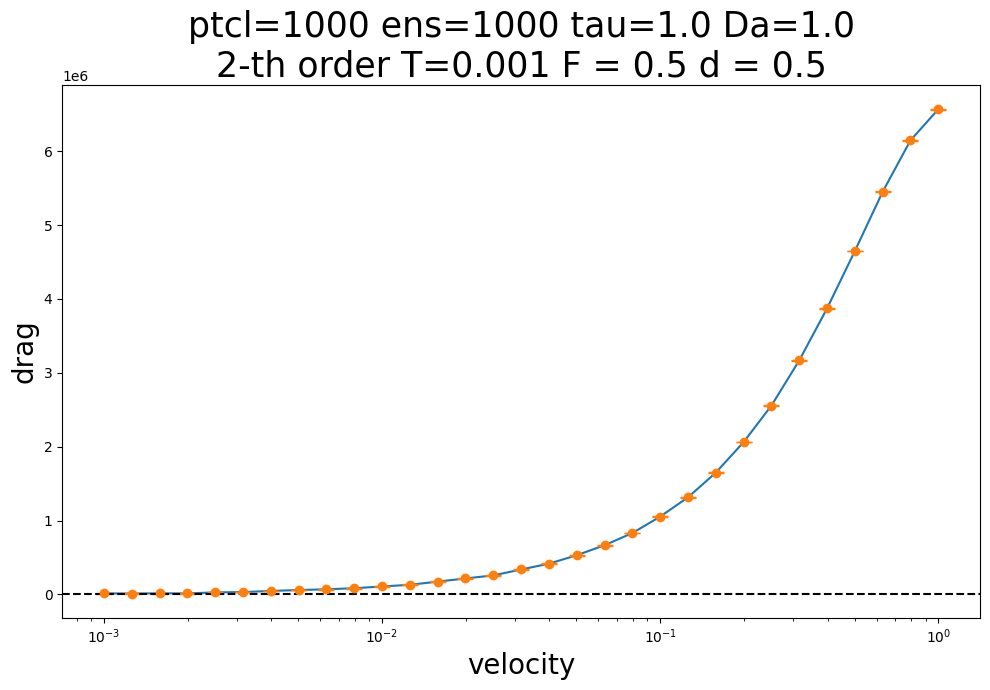

In [13]:
# fig, ax = plt.subplots(figsize=(10,7))

# f, d = 0.5, 0.5

# i, j = available_slope.index(f), available_Lambda.index(d)

# ax.set_title(f"ptcl={particle} ens={ensemble} tau={tau} Da={Da}\n{degree}-th order T={T} F = {available_slope[i]} d = {available_Lambda[j]}", fontsize=25)
# ax.set_xlabel("velocity", fontsize=20)
# ax.set_ylabel("drag", fontsize=20)
# ax.plot(available_velocity, drag[:,i,j])
# ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
# ax.axhline(0, linestyle="--", color="black")
# ax.set_xscale("log")
# # ax.set_xlim([0, 0.01])
# # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# Path(f"fig/{degree}/drag_by_velocity").mkdir(parents=True, exist_ok=True)
# plt.savefig(f"fig/{degree}/drag_by_velocity/ptcl={particle} ens={ensemble} f={f} d={d}.jpg")
# plt.show()

In [ ]:
# # available_slope, available_Lambda, available_velocity = sorted(
# #     set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
# # print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
# # print(f"slope = {available_slope}")
# # print(f"Lambda = {available_Lambda}")

# available_slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
# available_Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]

# # available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
# # print(f"velocity = {available_velocity}")

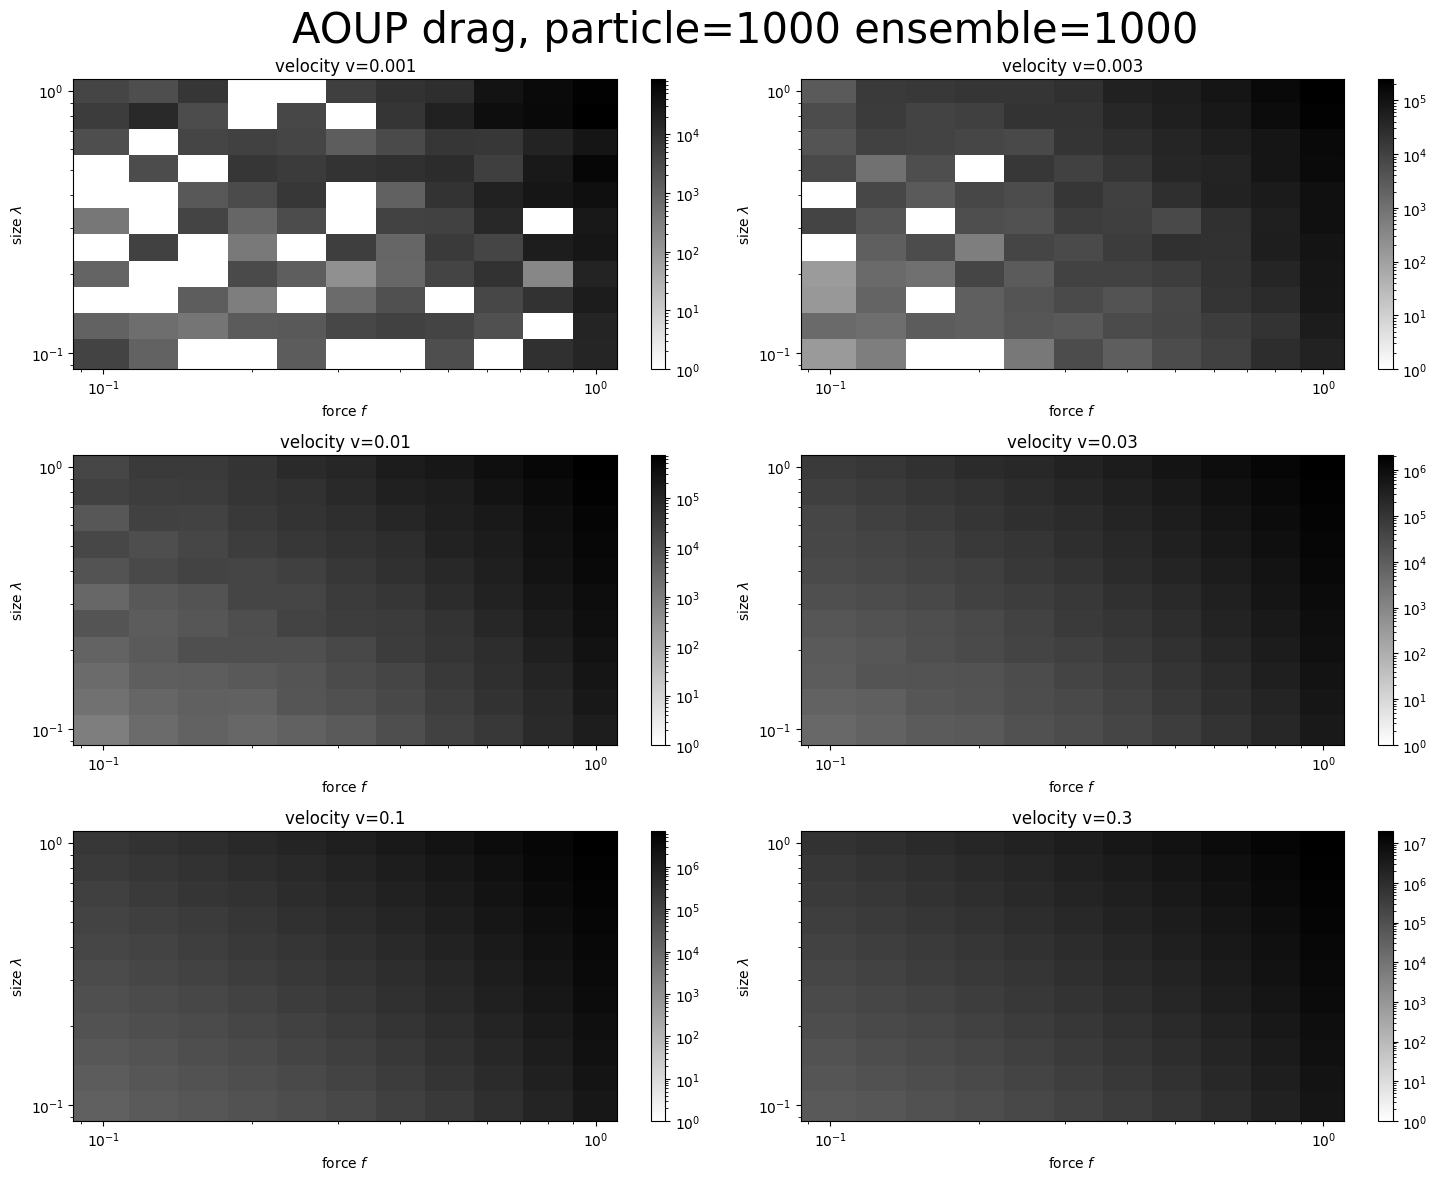

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=max(1,drag.max())), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/{degree}/drag/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}")
plt.show()

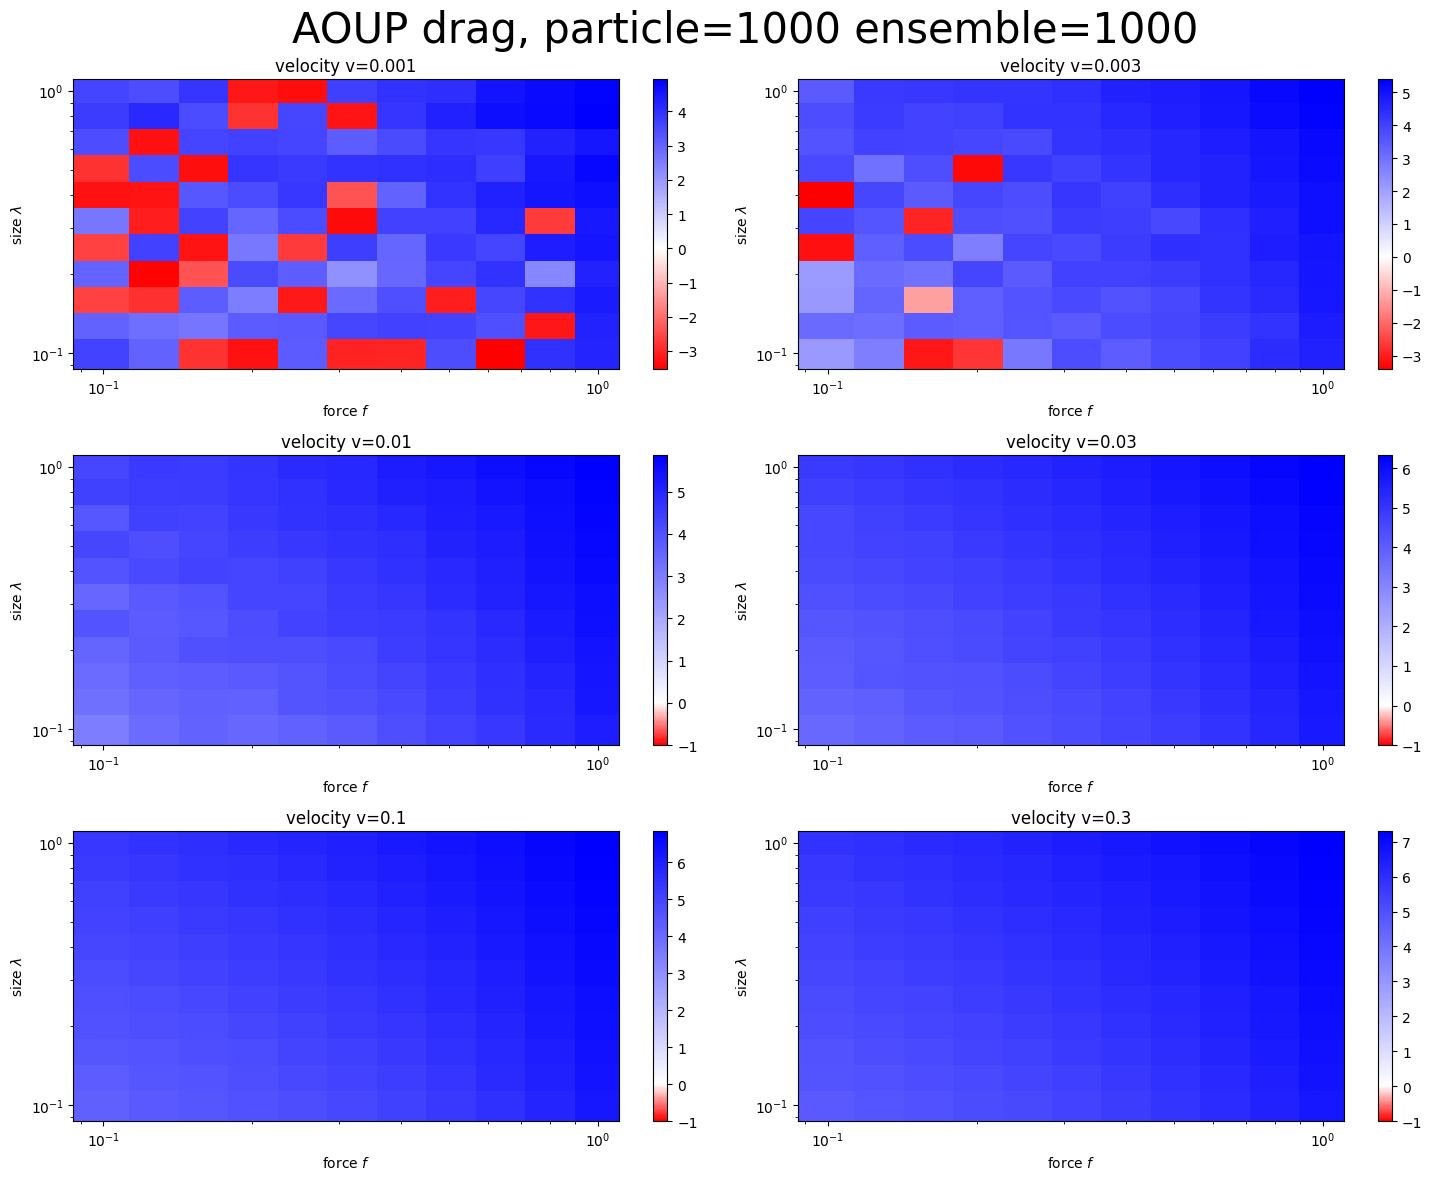

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

dir_name = Path(f"./fig/{degree}/drag")
Path(dir_name).mkdir(parents=True, exist_ok=True)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    cvals  = [min(data.min(), -1), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
    # if i == 5: sys.exit()

    ax.set_title(f"velocity v={np.round(velocity, 3)}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([1.e-1, 1.e0])|
    # ax.set_ylim([1.e-1, 1.e0])
    
    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"{dir_name}/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}.jpg")
plt.show()

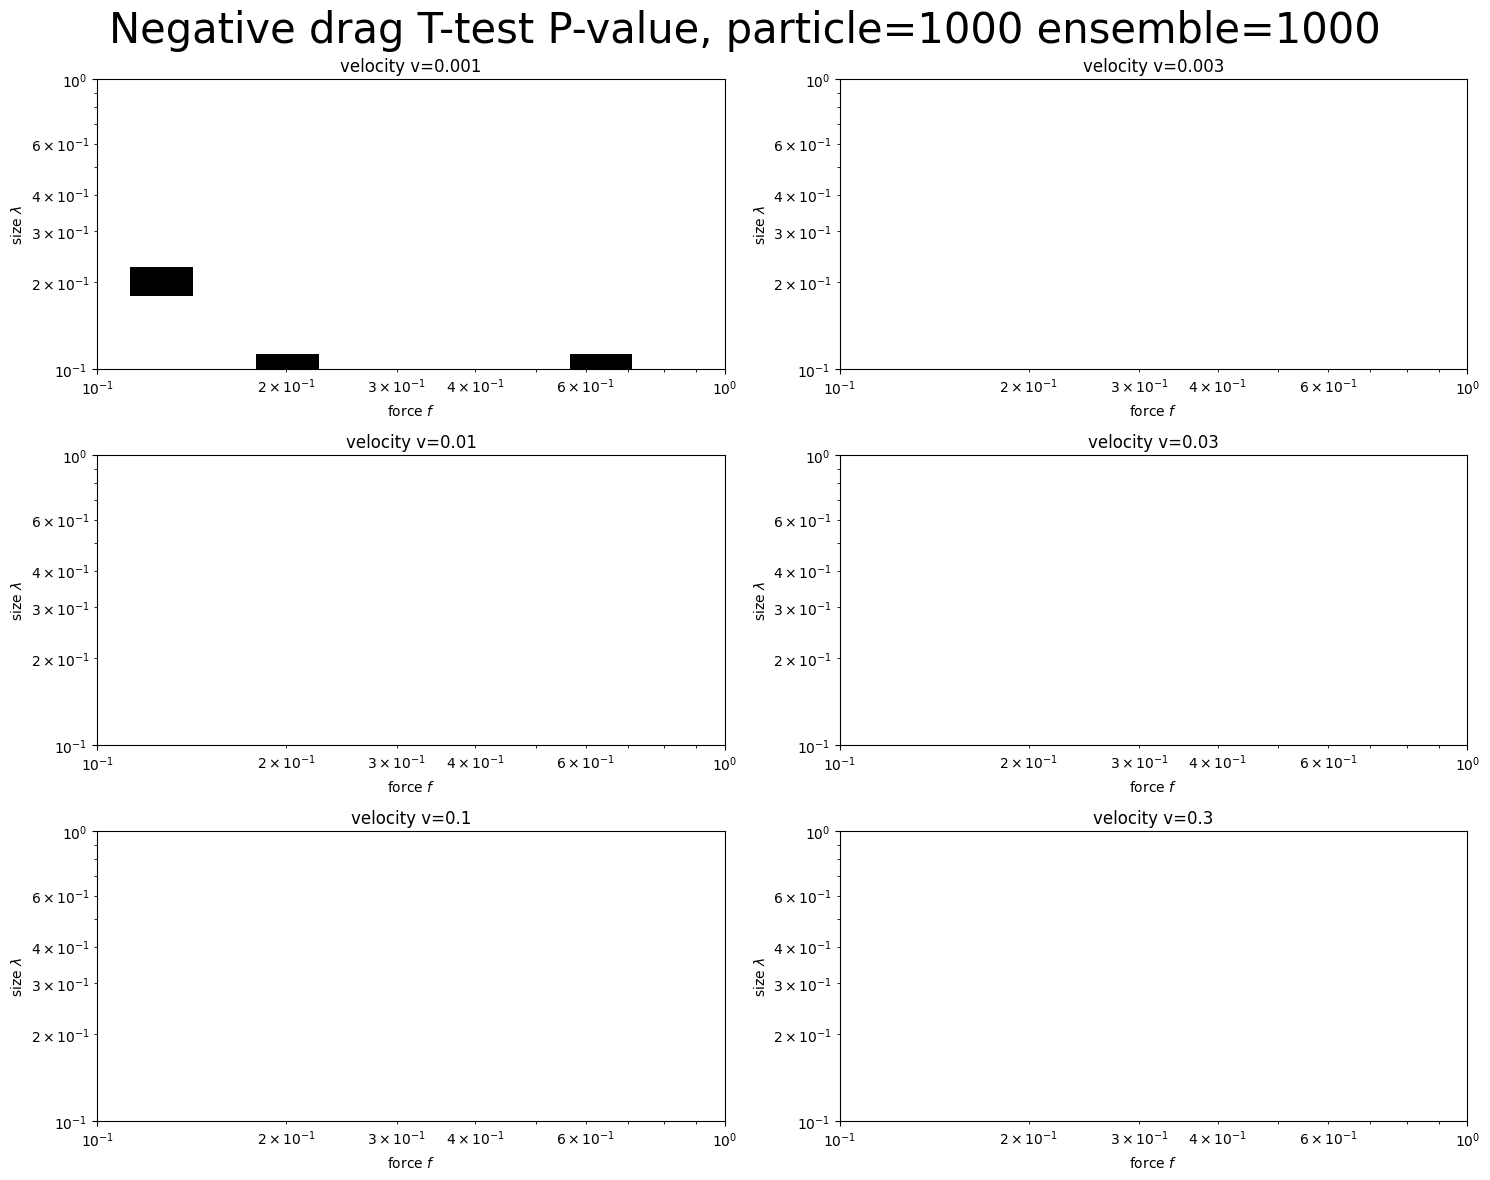

In [14]:
import scipy.stats

fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

dir_name = Path(f"./fig/{degree}/test")
dir_name.mkdir(parents=True, exist_ok=True)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    std = get_std_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [0.15, 0.16]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-1, 1.e0])
    ax.set_ylim([1.e-1, 1.e0])

    # cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"{dir_name}/T-test, ptcl={particle} ens={ensemble} sam={sampling}")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# velocity = 1.0

# drag = get_drag_by_velocity(df, velocity=velocity)
# print(np.log10(drag.max()), np.log10(-drag.min()))

# cvals  = [1, drag.max()]
# colors = ["white", "black"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                   norm=norm, cmap=cmap)

# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# ax.set_title(f"AOUP drag, velocity={velocity}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")

# cbar = plt.colorbar(c)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()

# data = get_log_scale(df, velocity=velocity)

# cvals  = [data.min(), 0, data.max()]
# colors = ["red","white","blue"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

# c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

# ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# drag = get_drag_by_velocity(df, velocity=velocity)
# std = get_std_by_velocity(df, velocity=velocity)

# Z = drag / std
# Z[np.isnan(Z)] = 0.0

# p_value = scipy.stats.norm.cdf(Z)
# # print(p_value)
# print(p_value.min())

# fig, ax = plt.subplots()

# cvals = [1.e-4, 1]
# colors = ["black", "white"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# # c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
# #                norm=norm, cmap=cmap)
# c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)

# ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()